# In this notebook, the selected dataset will be prepared and analyzed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("adult.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
from ydata_profiling import ProfileReport

# Generate the Report
profile = ProfileReport(data,title="Adult Census Profile")

In [4]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Como podemos observar, temos alguns problemas no dataset, tal como valores em falta, imbalance, zeros e valores duplicados

In [5]:
# Remove rows with null values
data_cleaned = data.dropna()

# Remove rows with "?" values
data_cleaned = data_cleaned[(data_cleaned != '?').all(axis=1)]

In [6]:
data_filtered = data_cleaned.drop(columns=['fnlwgt', 'education','capital.gain','capital.loss'])

## Vamos verificar os diferentes valores únicos para as classes categóricas:

In [7]:
categorical_columns = data_filtered.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    print(data_filtered[column].value_counts())
    print("-" * 50)  # Separator for readability

Column: workclass
workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: count, dtype: int64
--------------------------------------------------
Column: marital.status
marital.status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64
--------------------------------------------------
Column: occupation
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces 

### Let's transform the countries in region, as there is a giant imbalance

In [8]:
# Define a mapping for countries to continents
country_to_region = {
    'United-States': 'United States',
    'Mexico': 'Latin America',
    'Canada': 'United States',
    'El-Salvador': 'Latin America',
    'Guatemala': 'Latin America',
    'Cuba': 'Latin America',
    'Dominican-Republic': 'Latin America',
    'Trinadad&Tobago': 'Latin America',
    'Puerto-Rico': 'Latin America',
    'Jamaica': 'Latin America',
    'Honduras': 'Latin America',
    'Philippines': 'Asia',
    'India': 'Asia',
    'China': 'Asia',
    'Vietnam': 'Asia',
    'Japan': 'Asia',
    'Iran': 'Asia',
    'Taiwan': 'Asia',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Hong': 'Asia',
    'England': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'France': 'Europe',
    'Ireland': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Greece': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Hungary': 'Europe',
    'Ecuador': 'Latin America',
    'Columbia': 'Latin America',
    'Peru': 'Latin America',
    'Nicaragua': 'Latin America',
    'Haiti': 'Other',
    'South': 'Other',
    'Holand-Netherlands': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'Other',
}

# Map the countries to regions
data_filtered['region'] = data_filtered['native.country'].map(country_to_region)

# Handle any remaining unmapped values
data_filtered['region'] = data_filtered['region'].fillna('Other')

# Check the new grouped column
print(data_filtered['region'].value_counts())


region
United States    27611
Latin America     1297
Asia               634
Europe             493
Other              127
Name: count, dtype: int64


In [9]:
data_filtered = data_filtered.drop(columns=["native.country"])

### Let's also transform the race 'Amer-Indian-Eskimo' into 'Other'

In [10]:
data_filtered['race'] = data_filtered['race'].replace({'Amer-Indian-Eskimo': 'Other'})



Race Distribution:
 race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Other                   517
Name: count, dtype: int64

Sex Distribution:
 sex
Male      20380
Female     9782
Name: count, dtype: int64

Region Distribution:
 region
United States    27611
Latin America     1297
Asia               634
Europe             493
Other              127
Name: count, dtype: int64


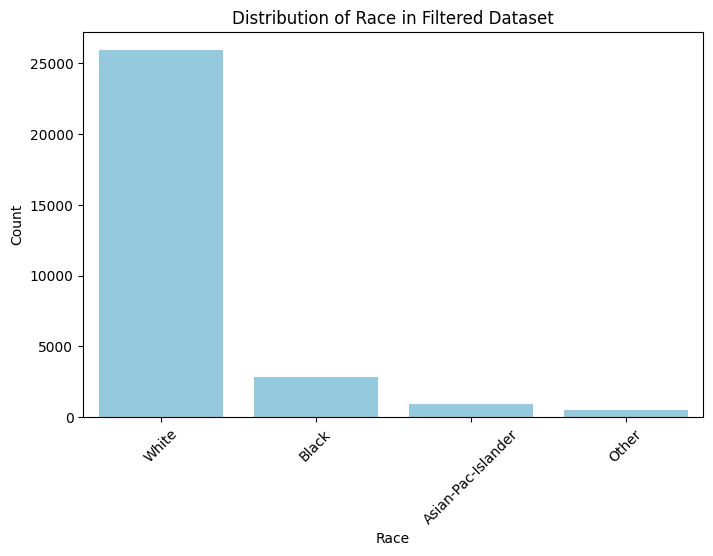

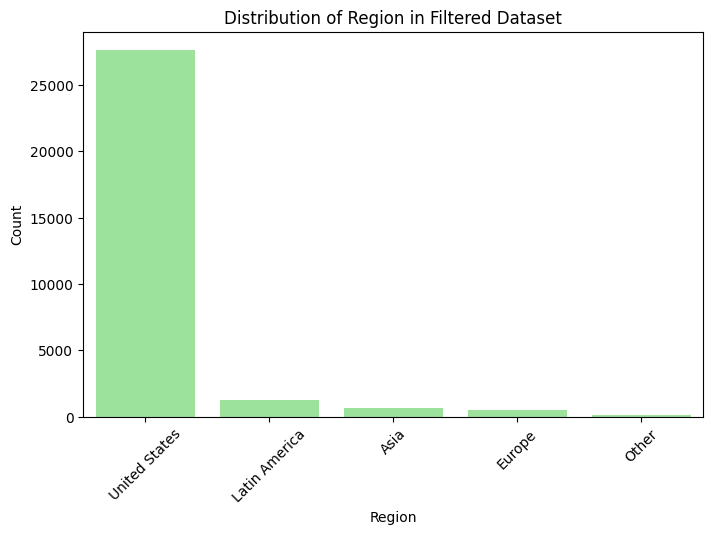

In [18]:
#import matplotlib
#import matplotlib.pyplot as plt
%matplotlib inline

# Analyze the 'race' column distribution
if 'race' in data_filtered.columns:
    race = data_filtered['race']
    race_distribution = race.value_counts()
    print("\nRace Distribution:\n", race_distribution)
else:
    print("\nThe 'race' column is not present. Available columns are:\n", data_filtered.columns)

# Analyze the 'sex' column distribution
if 'sex' in data_filtered.columns:
    sex = data_filtered['sex']
    sex_distribution = sex.value_counts()
    print("\nSex Distribution:\n", sex_distribution)
else:
    print("\nThe 'sex' column is not present. Available columns are:\n", data_filtered.columns)

# Analyze the 'region' column distribution
if 'region' in data_filtered.columns:
    region = data_filtered['region']
    region_distribution = region.value_counts()
    print("\nRegion Distribution:\n", region_distribution)
else:
    print("\nThe 'region' column is not present. Available columns are:\n", data_filtered.columns)

# Visualize Race Distribution
if 'race' in data_filtered.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=race_distribution.index, y=race_distribution.values, color="skyblue")  # Single color
    plt.title('Distribution of Race in Filtered Dataset')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualize Sex Distribution
if 'sex' in data_filtered.columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sex_distribution.index, y=sex_distribution.values, color="salmon")  # Single color
    plt.title('Distribution of Sex in Filtered Dataset')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

# Visualize Region Distribution
if 'region' in data_filtered.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=region_distribution.index, y=region_distribution.values, color="lightgreen")  # Single color
    plt.title('Distribution of Region in Filtered Dataset')
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [19]:
data_filtered.to_csv('adult_preprocessed.csv', index=False)